## Level 1
Exact expectation = 5 * 0.7kr = 3.5kr per BT

In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
set_size = 100000

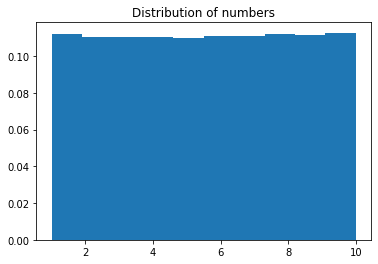

In [23]:
monte_carlo_rand_num = np.random.uniform(1, 10, set_size)
plt.hist(monte_carlo_rand_num, density=True)
plt.title("Distribution of numbers")
plt.show()

In [24]:
monte_carlo_scrap_sim = np.mean(np.vectorize(lambda x: x*0.7)(monte_carlo_rand_num))
print(monte_carlo_scrap_sim)

3.8570340794968665


Approximate $\approx$ 3.5

### Level 2


In [25]:
def m(x):
    return np.power(x, 1.5)

def BT_Fredriksen_price(x):
    return 100 + 1.1*np.sqrt(m(x))

hanging_magic_string_sum = np.mean(np.vectorize(lambda x: BT_Fredriksen_price(x))(monte_carlo_rand_num))
print(hanging_magic_string_sum)

103.86268869857102


Approximate $\approx$ 103.5

### Level 3

In [26]:
with open("../Data/brands.txt") as brands_table:
    table = brands_table.read()

table = table.split()

i = 0
table_dict = {}
while i < len(table):
    table_dict[table[i]] = (eval(table[i+1]), eval(table[i+3]), eval(table[i+4]), eval(table[i+6]), eval(table[i+7]))
    i += 8

In [27]:
def prob(m, lamb, k):
    y = -(m/(1+(np.abs(lamb))))**(1+np.abs(k))
    return 1 - np.exp(y)

def break_string(brand, m):
    if brand == '0':
        return False
    x = np.random.rand()
    k = np.random.normal(table_dict[brand][0], table_dict[brand][1], 1)[0]
    lamb = np.random.normal(table_dict[brand][2], table_dict[brand][3], 1)[0]
    return x >= prob(m, lamb, k)

def string_price(brand):
    return table_dict[brand][4] if brand != '0' else 0

In [28]:
l = []
for key in table_dict.keys():
    earnings = np.mean(np.vectorize(lambda x: (BT_Fredriksen_price(x)-table_dict[key][4]) if break_string(key, m(x))
                                    else x*0.7)(monte_carlo_rand_num))
    print("Brand:", key,"expected earnings:", earnings)
    l.append(earnings)

Brand: 1 expected earnings: 38.16513907120647
Brand: 2 expected earnings: 41.68010884321087
Brand: 3 expected earnings: 23.12385866804276
Brand: 4 expected earnings: 21.259889277427025
Brand: 5 expected earnings: 52.07990105529105
Brand: 6 expected earnings: 35.81001360234271
Brand: 7 expected earnings: 38.00012064142578
Brand: 8 expected earnings: 32.679415443416694
Brand: 9 expected earnings: 45.248179008843124
Brand: 10 expected earnings: 30.052602319971296


Brand 5 has the highest earnings with $\approx$ 52

In [29]:
print(np.mean(np.vectorize(lambda x: ((BT_Fredriksen_price(x))
                                    if break_string(str(np.random.randint(1,11)), m(x))
                                    else x*0.7)-table_dict[str(np.random.randint(1, 11))][4])(monte_carlo_rand_num)))


29.19436823610357


The expected value of a uniformly random choice brand is $\approx$ 29, so Hubert shouldn't sell to the guy his guy knows!!


In [30]:
def hubert_take_steps(n, epsilon, alpha=0.1):
    avg_earnings = {}
    plot_earnings = {}
    for key in table_dict.keys():
        avg_earnings[key] = 0
        plot_earnings[key] = [0]

    #Adding brand 0, which is selling to a guy who knows our guy...
    avg_earnings['0'] = 0
    plot_earnings['0'] = []

    reward = 0
    bts = np.random.uniform(1, 10, n)
    for bt in bts:
        p = np.random.rand()
        if p < 1-epsilon:
            max_key = max(avg_earnings, key=avg_earnings.get)
        else:
            max_key = str(np.random.randint(11))

        c_reward = (BT_Fredriksen_price(bt) if break_string(max_key, m(bt)) else bt*0.7)- (string_price(max_key))
        reward += c_reward
        avg_earnings[max_key] += alpha*(c_reward-avg_earnings[max_key])
        plot_earnings[max_key].append(c_reward)
    return plot_earnings, avg_earnings, reward

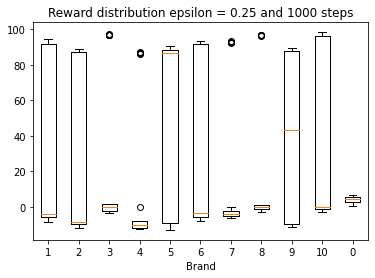

In [31]:
plot_earnings, avg_earnings, reward = hubert_take_steps(1000, 0.25)
plt.boxplot([plot_earnings[k] for k in plot_earnings.keys()], labels=plot_earnings.keys())
plt.title("Reward distribution epsilon = " + str(0.25) + " and " + str(1000) + " steps")
plt.xlabel("Brand")
plt.show()